## Indian Premier League (IPL) Regression Analysis

In [1]:
%%capture
# Due to the configuration of the base Jupter image, the following imports are required for the regressions in the assignment to report the correct metrics

import sys 
!{sys.executable} -m pip uninstall statsmodels --yes 
!{sys.executable} -m pip uninstall numpy --yes
!{sys.executable} -m pip uninstall pandas --yes 
!{sys.executable} -m pip uninstall patsy --yes 
!{sys.executable} -m pip install numpy==1.17
!{sys.executable} -m pip install pandas==1.0
!{sys.executable} -m pip install patsy==0.5.2
!{sys.executable} -m pip install statsmodels==0.11.1

In [2]:
# As usual, we begin by loading the packages we will need

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

In [3]:
# Now we load the data

IPL=pd.read_excel("Assignment Data/Week 5/IPL (assignment) data.xlsx")

In [4]:
IPL.describe()

,year,played,won,lost,noresult,points,netrunrate,champions,runnersup,third,fourth,salaries
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,9.200000e+01
mean,2012.945652,14.391304,7.076087,7.076087,0.239130,14.391304,0.001772,0.119565,0.119565,0.097826,0.086957,7.110445e+06
std,3.125099,0.797751,2.195068,2.164822,0.477391,4.332237,0.519739,0.326230,0.326230,0.298707,0.283315,2.663266e+06
min,2008.000000,14.000000,2.000000,3.000000,0.000000,4.000000,-1.436000,0.000000,0.000000,0.000000,0.000000,1.725000e+06
25%,2010.000000,14.000000,6.000000,5.000000,0.000000,12.000000,-0.343750,0.000000,0.000000,0.000000,0.000000,5.178750e+06
50%,2013.000000,14.000000,7.000000,7.000000,0.000000,14.000000,0.018000,0.000000,0.000000,0.000000,0.000000,6.809583e+06
75%,2016.000000,14.000000,9.000000,8.000000,0.000000,18.000000,0.323000,0.000000,0.000000,0.000000,0.000000,9.286749e+06
max,2018.000000,16.000000,11.000000,13.000000,2.000000,22.000000,1.084000,1.000000,1.000000,1.000000,1.000000,1.334500e+07


In [5]:
IPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        92 non-null     int64  
 1   team        92 non-null     object 
 2   played      92 non-null     int64  
 3   won         92 non-null     int64  
 4   lost        92 non-null     int64  
 5   noresult    92 non-null     int64  
 6   points      92 non-null     int64  
 7   netrunrate  92 non-null     float64
 8   champions   92 non-null     int64  
 9   runnersup   92 non-null     int64  
 10  third       92 non-null     int64  
 11  fourth      92 non-null     int64  
 12  salaries    92 non-null     int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 9.5+ KB


In [7]:
IPL.head()

,year,team,played,won,lost,noresult,points,netrunrate,champions,runnersup,third,fourth,salaries
0,2008,Chennai Super Kings,14,8,6,0,16,-0.192,0,1,0,0,5825000
1,2009,Chennai Super Kings,14,8,5,1,17,0.951,0,0,0,0,6765000
2,2010,Chennai Super Kings,14,7,7,0,14,0.274,1,0,0,0,4890000
3,2011,Chennai Super Kings,14,9,5,0,18,0.443,1,0,0,0,6330000
4,2012,Chennai Super Kings,16,8,7,1,17,0.100,0,1,0,0,7900000


In [8]:
sumsal= IPL.groupby('year')['salaries'].sum().reset_index().rename(columns={'salaries': 'allsal'})
sumsal

,year,allsal
0,2008,34105000
1,2009,33445000
2,2010,33075000
3,2011,62210000
4,2012,59706250
5,2013,81535000
6,2014,73973332
7,2015,65242665
8,2016,63483666
9,2017,63014833


In [9]:
IPL= pd.merge(IPL, sumsal, on='year', how='left')
IPL.head()

,year,team,played,won,lost,noresult,points,netrunrate,champions,runnersup,third,fourth,salaries,allsal
0,2008,Chennai Super Kings,14,8,6,0,16,-0.192,0,1,0,0,5825000,34105000
1,2009,Chennai Super Kings,14,8,5,1,17,0.951,0,0,0,0,6765000,33445000
2,2010,Chennai Super Kings,14,7,7,0,14,0.274,1,0,0,0,4890000,33075000
3,2011,Chennai Super Kings,14,9,5,0,18,0.443,1,0,0,0,6330000,62210000
4,2012,Chennai Super Kings,16,8,7,1,17,0.100,0,1,0,0,7900000,59706250


In [10]:
# create relsal
IPL['relsal']= IPL.salaries/ IPL.allsal 
IPL.head()

,year,team,played,won,lost,noresult,points,netrunrate,champions,runnersup,third,fourth,salaries,allsal,relsal
0,2008,Chennai Super Kings,14,8,6,0,16,-0.192,0,1,0,0,5825000,34105000,0.170796
1,2009,Chennai Super Kings,14,8,5,1,17,0.951,0,0,0,0,6765000,33445000,0.202272
2,2010,Chennai Super Kings,14,7,7,0,14,0.274,1,0,0,0,4890000,33075000,0.147846
3,2011,Chennai Super Kings,14,9,5,0,18,0.443,1,0,0,0,6330000,62210000,0.101752
4,2012,Chennai Super Kings,16,8,7,1,17,0.100,0,1,0,0,7900000,59706250,0.132314


In [15]:
IPL['played_with_results']= IPL.played- IPL.noresult

In [18]:
IPL['wpc']= IPL.won/ IPL.played_with_results
IPL.head()

,year,team,played,won,lost,noresult,points,netrunrate,champions,runnersup,third,fourth,salaries,allsal,relsal,wpc,played_with_results
0,2008,Chennai Super Kings,14,8,6,0,16,-0.192,0,1,0,0,5825000,34105000,0.170796,0.571429,14
1,2009,Chennai Super Kings,14,8,5,1,17,0.951,0,0,0,0,6765000,33445000,0.202272,0.615385,13
2,2010,Chennai Super Kings,14,7,7,0,14,0.274,1,0,0,0,4890000,33075000,0.147846,0.500000,14
3,2011,Chennai Super Kings,14,9,5,0,18,0.443,1,0,0,0,6330000,62210000,0.101752,0.642857,14
4,2012,Chennai Super Kings,16,8,7,1,17,0.100,0,1,0,0,7900000,59706250,0.132314,0.533333,15


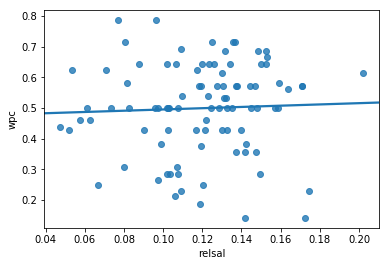

In [17]:
sns.regplot(x='relsal', y='wpc', data=IPL, ci=False)

In [20]:
wpcsal1_lm= smf.ols(formula='wpc ~ relsal', data=IPL).fit()
print(wpcsal1_lm.summary())
# for every 1% increase in share of the team in total salaries leads to 0.2050 *.01 increase in win %

                            OLS Regression Results                            
Dep. Variable:                    wpc   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.1622
Date:                Wed, 21 Dec 2022   Prob (F-statistic):              0.688
Time:                        15:45:46   Log-Likelihood:                 45.259
No. Observations:                  92   AIC:                            -86.52
Df Residuals:                      90   BIC:                            -81.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4752      0.063      7.563      0.0

In [22]:
IPL.sort_values(by=['team', 'year'], ascending=True).head()

,year,team,played,won,lost,noresult,points,netrunrate,champions,runnersup,third,fourth,salaries,allsal,relsal,wpc,played_with_results
0,2008,Chennai Super Kings,14,8,6,0,16,-0.192,0,1,0,0,5825000,34105000,0.170796,0.571429,14
1,2009,Chennai Super Kings,14,8,5,1,17,0.951,0,0,0,0,6765000,33445000,0.202272,0.615385,13
2,2010,Chennai Super Kings,14,7,7,0,14,0.274,1,0,0,0,4890000,33075000,0.147846,0.500000,14
3,2011,Chennai Super Kings,14,9,5,0,18,0.443,1,0,0,0,6330000,62210000,0.101752,0.642857,14
4,2012,Chennai Super Kings,16,8,7,1,17,0.100,0,1,0,0,7900000,59706250,0.132314,0.533333,15


In [24]:
IPL['wpc_lag']= IPL.groupby('team')['wpc'].shift(1)
IPL.head()

,year,team,played,won,lost,noresult,points,netrunrate,champions,runnersup,third,fourth,salaries,allsal,relsal,wpc,played_with_results,wpc_lag
0,2008,Chennai Super Kings,14,8,6,0,16,-0.192,0,1,0,0,5825000,34105000,0.170796,0.571429,14,NaN
1,2009,Chennai Super Kings,14,8,5,1,17,0.951,0,0,0,0,6765000,33445000,0.202272,0.615385,13,0.571429
2,2010,Chennai Super Kings,14,7,7,0,14,0.274,1,0,0,0,4890000,33075000,0.147846,0.500000,14,0.615385
3,2011,Chennai Super Kings,14,9,5,0,18,0.443,1,0,0,0,6330000,62210000,0.101752,0.642857,14,0.500000
4,2012,Chennai Super Kings,16,8,7,1,17,0.100,0,1,0,0,7900000,59706250,0.132314,0.533333,15,0.642857


In [25]:
wpcsal2_lm= smf.ols(formula='wpc ~ wpc_lag +relsal', data=IPL).fit()
print(wpcsal2_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    wpc   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.591
Date:                Wed, 21 Dec 2022   Prob (F-statistic):              0.210
Time:                        15:51:19   Log-Likelihood:                 43.314
No. Observations:                  79   AIC:                            -80.63
Df Residuals:                      76   BIC:                            -73.52
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3489      0.087      4.003      0.0

In [26]:
wpcsal3_lm= smf.ols(formula= 'wpc ~ wpc_lag + relsal + C(team)', data=IPL).fit()
print(wpcsal3_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    wpc   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     2.117
Date:                Wed, 21 Dec 2022   Prob (F-statistic):             0.0245
Time:                        15:52:22   Log-Likelihood:                 55.639
No. Observations:                  79   AIC:                            -83.28
Df Residuals:                      65   BIC:                            -50.10
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------